<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Classification/All-AlgorithmsAll_Classification_algorithms_on_Advertising_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Visualisation graph

from google.colab import files
files.upload()

In [8]:
!ls

sample_data  Social_Network_Ads.csv


In [10]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
X = df.iloc[:, 1:-1]
y = df.Purchased

In [12]:
X.shape, y.shape

((400, 3), (400,))

In [13]:
X = pd.get_dummies(X, drop_first = True)
X.shape

(400, 3)

In [14]:
X.head(2)

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1


# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 3), (100, 3), (300,), (100,))

# Feature_scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train Model

# LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression(random_state = 0)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = model.predict(X_test_scaled)

In [57]:
model.score(X_train_scaled, y_train)

0.8333333333333334

In [58]:
model.score(X_test_scaled, y_test)

0.91

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 6, 26]])

In [61]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94        68
          1       0.90      0.81      0.85        32

avg / total       0.91      0.91      0.91       100



In [0]:
y_proba = model.predict_proba(X_test_scaled)

In [64]:
y_proba[:2]

array([[0.87565486, 0.12434514],
       [0.84279008, 0.15720992]])

In [65]:
model.coef_

array([[2.07997332, 1.11053785, 0.09186917]])

## 2. LogisticRegression with PolynomialFeatures

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
lrmodel = LogisticRegression()
lrmodel.fit(X_train_poly, y_train)
print(F' Train score is {lrmodel.score(X_train_poly, y_train)}')
print('\n')
print(f'Test score is {lrmodel.score(X_test_poly, y_test)}')
print('\n\n')
y_pred = lrmodel.predict(X_test_poly)
print(f'confusion matrix is \n {confusion_matrix(y_test, y_pred)}')
print('\n\n')
print(f'classification report is \n {classification_report(y_test, y_pred)}')

 Train score is 0.92


Test score is 0.94



confusion matrix is 
 [[65  3]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.96      0.96        68
          1       0.91      0.91      0.91        32

avg / total       0.94      0.94      0.94       100



In [99]:
lrmodel.coef_

array([[-0.44951661,  0.60239659,  0.87871662,  0.02575611, -0.0756638 ,
        -0.24896802, -0.01765001,  0.5590373 ,  0.17963394, -0.44848616,
         0.343962  , -0.25145039, -0.06046288,  0.52018439,  0.22080972,
         0.60169044, -0.10507773, -0.08664123,  0.88590341,  0.00781308,
        -0.393108  , -0.05786278, -0.20421042,  0.11893628,  0.17475364,
        -0.0780828 , -0.4738856 ,  0.01056977, -0.24013387,  0.00642243,
        -0.4921722 , -0.1349877 ,  0.55557096,  0.21507716, -0.44817357,
         0.29657407, -0.02630471,  0.27408338,  0.1810735 , -0.18449992,
         0.33579194, -0.44605958,  0.42268029, -0.24445884, -0.06358682,
        -0.08061454, -0.5182146 ,  0.52060726,  0.21120245,  0.60194739,
         0.07274404,  0.58975475, -0.11047832, -0.06441394,  0.89450822,
        -0.01011745,  0.1802476 ,  0.66178253,  0.12725401, -0.25379403,
         0.23464599, -0.38214247, -0.47427816,  0.43110263, -0.06524425,
        -0.19077605,  0.77596838, -0.07703413,  0.1

In [100]:
lrmodel.intercept_

array([-0.44951661])

### probability of y_test

In [0]:
y_test_proba = lrmodel.predict_proba(X_test_poly)

In [102]:
y_test_proba[:2]

array([[0.9201132 , 0.0798868 ],
       [0.94888294, 0.05111706]])

In [103]:
y_max_proba = [np.max(i) for i in y_test_proba]
y_max_proba[:2]

[0.9201131984533866, 0.9488829439074131]

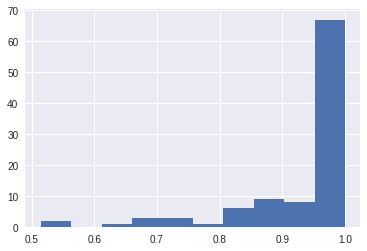

In [104]:
plt.hist(y_max_proba)
plt.show()

### graph

## 3. KNN

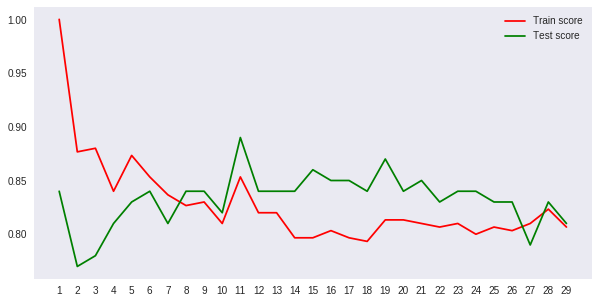

In [50]:
x = range(1,30)
t = []
s = []
for i in x:
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, y_train)
  s.append(model.score(X_test, y_test))
  t.append(model.score(X_train, y_train))
  
plt.figure(figsize =(10, 5))
plt.plot(x, t, c = 'r', label = 'Train score')
plt.plot(x, s, c = 'g', label = 'Test score')
plt.xticks(x)          
plt.legend()    
plt.grid()

### After Scaling the Features

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

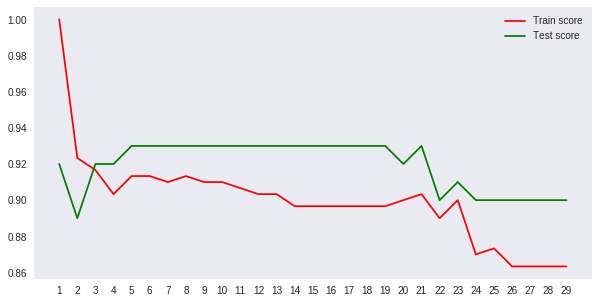

In [52]:
x = range(1,30)
t = []
s = []
for i in x:
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train_scaled, y_train)
  s.append(model.score(X_test_scaled, y_test))
  t.append(model.score(X_train_scaled, y_train))
  
plt.figure(figsize =(10, 5))
plt.plot(x, t, c = 'r', label = 'Train score')
plt.plot(x, s, c = 'g', label = 'Test score')
plt.xticks(x)          
plt.legend()    
plt.grid()

### n_neighbors = 3

In [93]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_scaled, y_train)
print(F' Train score is {model.score(X_train_scaled, y_train)}')
print('\n')
print(f'Test score is {model.score(X_test_scaled, y_test)}')
print('\n\n')
y_pred = model.predict(X_test_scaled)
print(f'confusion matrix is \n {confusion_matrix(y_test, y_pred)}')
print('\n\n')
print(f'classification report is \n {classification_report(y_test, y_pred)}')

 Train score is 0.9166666666666666


Test score is 0.92



confusion matrix is 
 [[64  4]
 [ 4 28]]



classification report is 
              precision    recall  f1-score   support

          0       0.94      0.94      0.94        68
          1       0.88      0.88      0.88        32

avg / total       0.92      0.92      0.92       100



### n_neighbors = 5

In [95]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train_scaled, y_train)
print(F' Train score is {model.score(X_train_scaled, y_train)}')
print('\n')
print(f'Test score is {model.score(X_test_scaled, y_test)}')
print('\n\n')
y_pred = model.predict(X_test_scaled)
print(f'confusion matrix is \n {confusion_matrix(y_test, y_pred)}')
print('\n\n')
print(f'classification report is \n {classification_report(y_test, y_pred)}')

 Train score is 0.9133333333333333


Test score is 0.93



confusion matrix is 
 [[64  4]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



## SVC

In [0]:
from sklearn.svm import SVC

In [30]:
model = SVC(C = 0.0000001)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.63

In [31]:
model.score(X_test, y_test)

0.68